### **1. Git Clone and set tensorflow backend version to 2.x**

# Image segmentation using mask-rcnn costum model with tensorflow 2


## **author: koussaila kadi**

In [1]:
"""

Méthode 1: ----------------------------------------------

# clone Mask-RCNN from Github: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 
! cd Mask_RCNN
! python -m pip install --upgrade pip
! pip install -r requirements.txt

Méthode 2: ----------------------------------------------
create vertual environnement for python: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 
! mkdir env
! cd env
! python -m venv .
! pip install -r ../Mask_RCNN/requirements.txt

your environnement is setup. 
"""
%matplotlib inline

In [2]:
import os
import sys
sys.path.append("./")
print(os.getcwd())
print(os.listdir(os.getcwd()))
from mrcnn import *
from mrcnn.m_rcnn import *

c:\Users\HP\Desktop\Mask_RCNN
['.git', '.gitignore', '.vscode', '121.jpg.png', 'annotations_coco.json', 'dataset', 'env', 'images', 'img', 'Inference_Demo_Mask_RCNN.ipynb', 'inference_MaskRCNN.py', 'logs', 'mask_rcnn_coco.h5', 'mrcnn', 'mrcnn_TF1', 'README.md', 'requirements.txt', 'result.bmp', 'Train_Demo_Mask_RCNN.ipynb', 'with_cracks.zip']
VERS 0.2


## **2. Dataset**

Load your annotated dataset

In [3]:
# Extract Images
images_path = "with_cracks.zip"
annotations_path = "annotations_coco.json"
extract_images(images_path, "./dataset")

Extracted: 687 images


In [4]:
dataset_train = load_image_dataset( annotations_path, "dataset", "train")
dataset_val = load_image_dataset( annotations_path, "dataset", "val")
dataset_test = load_image_dataset(annotations_path, "dataset", "test")
class_number = dataset_train.count_classes()
print('All images :',len(dataset_train.image_ids)+len(dataset_val.image_ids)+len(dataset_test.image_ids))
print('Train:',len(dataset_train.image_ids))
print('Validation:',len(dataset_val.image_ids))
print('test: ',len(dataset_test.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations_coco.json
Annotation json path:  annotations_coco.json
Annotation json path:  annotations_coco.json
All images : 687
Train: 602
Validation: 43
test:  42
Classes: 2


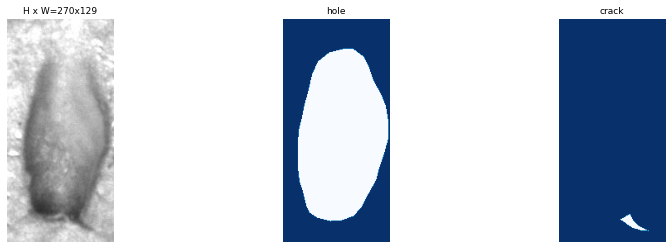

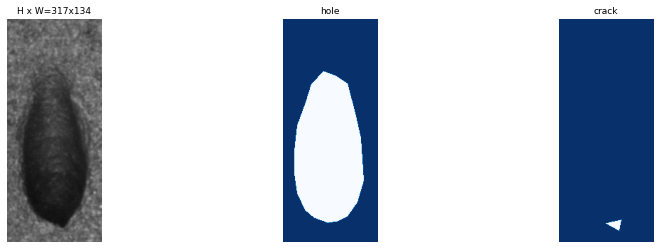

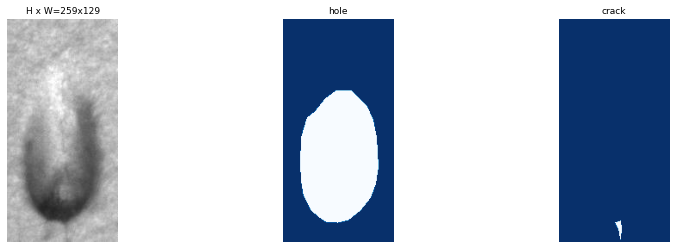

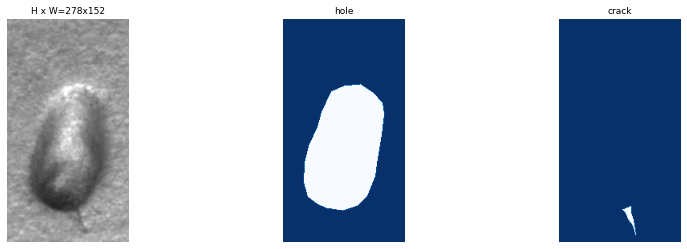

In [8]:
# Load image samples
display_image_samples(dataset_train)

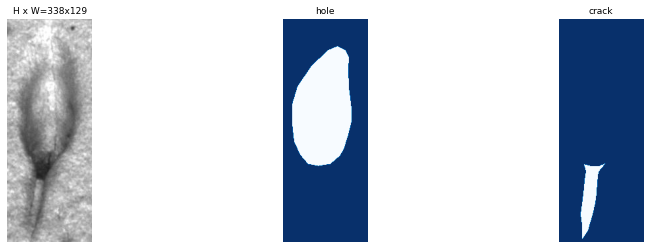

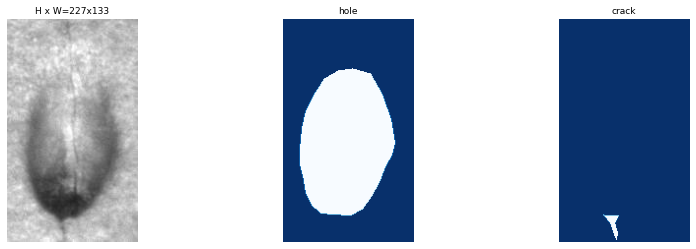

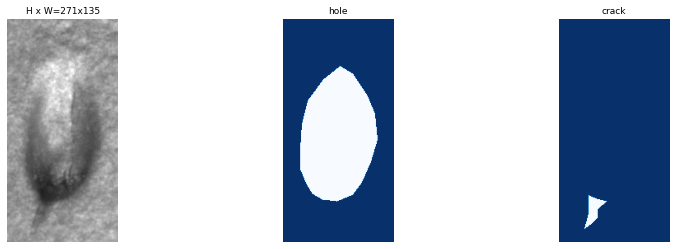

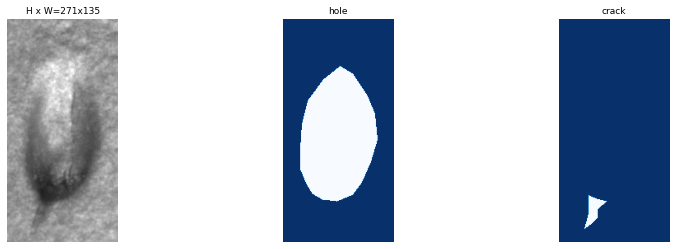

In [9]:
# Load image samples
display_image_samples(dataset_val)

## **3. Inference**

### model configuration 

In [5]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 300
    VALIDATION_STEPS = 20

    # Images size:  
    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384

    #mini mask:
    USE_MINI_MASK = False

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    # learning rate
    LEARNING_RATE = 0.001

    
# Load Configuration
config = CustomConfig()
config.display()
#model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

### model inference: 

In [6]:
#LOAD MODEL. Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


# Get path to saved weightsµ
model_path = "./logs/mask_rcnn_object_0018.h5"

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights from  ./logs/mask_rcnn_object_0018.h5


### Prediction

original image


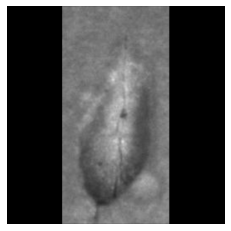

Ground Truth


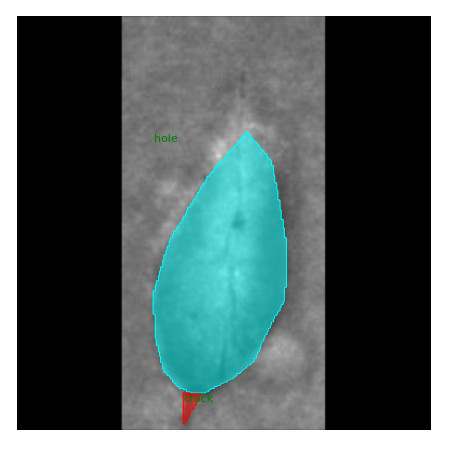

Prediction
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


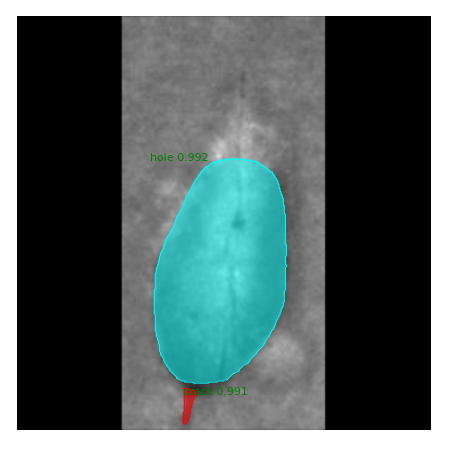

In [7]:
image_id = random.choice(dataset_test.image_ids)
#image_id=22
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
    modellib.load_image_gt(dataset_test, config,
                            image_id)

print('original image')
plt.imshow(original_image)
plt.axis('off')
plt.show()


# original masks:
print("Ground Truth")
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset_val.class_names, figsize=(8, 8),show_bbox=False)


# Model result
print("Prediction")
results = model.detect([original_image], verbose=0)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            dataset_test.class_names, r['scores'], ax=get_ax(), show_bbox=False)

************** fin *************

(318, 132, 3)
Prediction


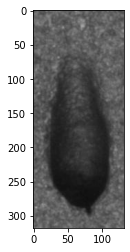

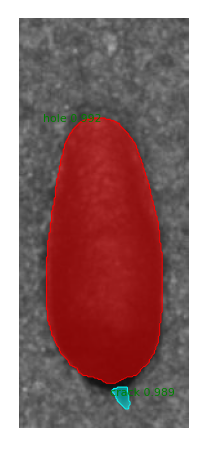

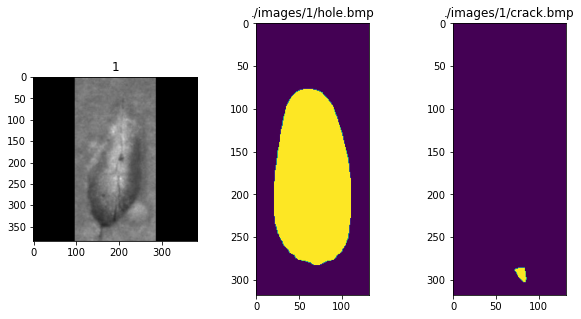

'for image_id in image_ids:\n    image = dataset_train.load_image(image_id)\n    mask, class_ids = dataset_train.load_mask(image_id)\n    #visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names,limit=2)\n   \n    create_dir("./images/",str(image_id))\n    save_mask_holes(image, mask, class_ids, dataset_train.class_names,image_id)'

In [18]:
from skimage import io
import os, shutil

def create_dir(location, dir):
    print(os.getcwd())
    path= os.path.join(location, dir)
    os.mkdir(path)   


# cancel borders: 
def corp_margin(img,param=900):
        try:
                # original image
                img2=img.sum(axis=2)
        except:
                # cracks and holes:
                img2=img
                
        (row,col)=img2.shape
        row_top=0
        raw_down=0
        col_top=0
        col_down=0

        for r in range(0,row):
                if img2.sum(axis=1)[r]<param*col:
                        row_top=r
                        break
 
        for r in range(row-1,0,-1):
                if img2.sum(axis=1)[r]<param*col:
                        raw_down=r
                        break
 
        for c in range(0,col):
                if img2.sum(axis=0)[c]<param*row:
                        col_top=c
                        break
 
        for c in range(col-1,0,-1):
                if img2.sum(axis=0)[c]<param*row:
                        col_down=c
                        break
 
        try:    
                # cracks and holes:
                new_img=img[row_top:raw_down+1,col_top:col_down+1]
        except :
                # original image:
                new_img=img[row_top:raw_down+1,col_top:col_down+1,3:0]

        return new_img



def save_mask_holes(image, mask, class_ids, class_names,image_id, limit=2):
        """Display the given image and the top few class masks."""
        masks = []
        masks.append(image)
        titles=[]
        titles.append(str(image_id))

        # Pick top prominent classes in this image
        unique_class_ids = np.unique(class_ids)
        mask_area = [np.sum(mask[:, :, np.where(class_ids == i)[0]])
                        for i in unique_class_ids]
        top_ids = [v[0] for v in sorted(zip(unique_class_ids, mask_area),
                                        key=lambda r: r[1], reverse=True) if v[1] > 0]
        # Generate images and titles
        for i in range(limit):
                class_id = top_ids[i] if i < len(top_ids) else -1
                # Pull masks of instances belonging to the same class.
                m = mask[:, :, np.where(class_ids == class_id)[0]]
                m = np.sum(m * np.arange(1, m.shape[-1] + 1), -1)

                # remove padded borders:
                m=corp_margin(m)

                masks.append(m)
                title=class_names[class_id] if class_id != -1 else "-"

                titles.append(f'./images/{image_id}/{str(title)}.bmp')

        return masks, titles


def save(masks, titles):
        for name, image in zip(masks, titles):
                io.imsave(name,image)
                #io.imshow(image)
    
def display_cracks_holes(masks, titles):
        fig, ax= plt.subplots(1,3,figsize=(10,5))
        for i in range(len(titles)):
                ax[i].set_axis_off
                ax[i].set_title(titles[i])
                ax[i].imshow(masks[i])
        plt.show()

# test: 
class_names=['BG', 'hole', 'crack']
image_path="121.jpg.png"
image=cv2.imread(image_path)
print(image.shape)
plt.imshow(image,'gray')

# Model result
print("Prediction")
results = model.detect([image], verbose=0)
r = results[0]
predicted=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'], ax=get_ax(), show_bbox=False,get_image=True)


masks, titles=save_mask_holes(original_image, r['masks'], r['class_ids'], class_names,image_id=1, limit=2)

display_cracks_holes(masks, titles)

# cat wight borders:
"""m=corp_margin(masks)
for name, image in zip(masks, titles):
        io.imsave(name,image)
        io.imshow(image)"""

# Load and display random samples
#image_ids = np.random.choice(dataset_train.image_ids, 4)
#color = visualize.random_colors(1)

# 
"""for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    #visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names,limit=2)
   
    create_dir("./images/",str(image_id))
    save_mask_holes(image, mask, class_ids, dataset_train.class_names,image_id)"""

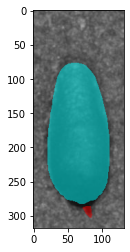

'for name, image in zip(masks, titles):\n        io.imsave(name,image)\n        io.imshow(image)'

In [11]:
from skimage import io

# cancel borders: 
def corp_margin(img,param=900):
        try:
                # original image
                img2=img.sum(axis=2)
        except:
                # cracks and holes:
                img2=img
                
        (row,col)=img2.shape
        row_top=0
        raw_down=0
        col_top=0
        col_down=0

        for r in range(0,row):
                if img2.sum(axis=1)[r]<param*col:
                        row_top=r
                        break
 
        for r in range(row-1,0,-1):
                if img2.sum(axis=1)[r]<param*col:
                        raw_down=r
                        break
 
        for c in range(0,col):
                if img2.sum(axis=0)[c]<param*row:
                        col_top=c
                        break
 
        for c in range(col-1,0,-1):
                if img2.sum(axis=0)[c]<param*row:
                        col_down=c
                        break
 
        try:    
                # cracks and holes:
                new_img=img[row_top:raw_down+1,col_top:col_down+1]
        except :
                # original image:
                new_img=img[row_top:raw_down+1,col_top:col_down+1,3:0]

        return new_img


m=corp_margin(predicted)
plt.imshow(m)
plt.show()
io.imsave('result.bmp',m)
"""for name, image in zip(masks, titles):
        io.imsave(name,image)
        io.imshow(image)"""

In [ ]:
display_cracks_holes(masks, titles)

"""im = io.imread('images/27/crack.png')
print(im.shape)
io.imshow(im)

img_re = corp_margin(im,param=900)
print(img_re.shape)
io.imsave('result.png',img_re)
io.imshow(img_re)"""


"""class_names=['BG', 'hole', 'crack']
image_path="121.jpg.png"
image=cv2.imread(image_path)
plt.imshow(image,'gray')

# Model result
print("Prediction")
results = model.detect([image], verbose=0)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'], ax=get_ax(), show_bbox=False)


to_display=save_mask_holes(original_image, r['masks'], r['class_ids'], class_names,image_id=1, limit=2)"""

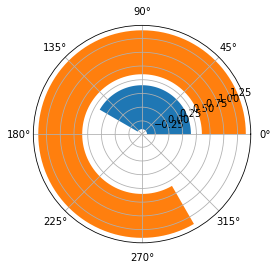

In [16]:
ax = plt.subplot(projection='polar')
ax.barh(0, math.radians(150))
ax.barh(1, math.radians(300))
plt.show()

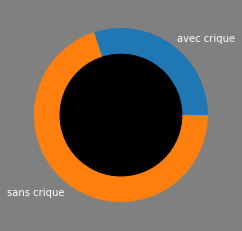

In [22]:
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('grey')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle at the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.pie([30,70], labels={'avec crique','sans crique'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()